In [79]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from datetime import datetime
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

https://archive.ics.uci.edu/ml/datasets/wine+quality

In [12]:
link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(link, delimiter=';')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


1.Оцените качество по метрике accuracy для классификаторов:

DecisionTreeClassifier

BaggingClassifier со 100 деревьями

RandomForestClassifier со 100 деревьями

Сравните результаты и напишите какой вывод можно сделать.

In [32]:
RandomForest = RandomForestClassifier(random_state=42)
Bagging = BaggingClassifier(random_state=42)
DecisionTree = DecisionTreeClassifier(random_state=42)

x = data.loc[:,:'chlorides']
y = data['quality']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

RandomForest_fit = RandomForest.fit(x_train, y_train)
Bagging_fit = Bagging.fit(x_train, y_train)
DecisionTree_fit = Bagging.fit(x_train, y_train)

RandomForest_fit_score = RandomForest_fit.score(x_train, y_train)
Bagging_fit_score = Bagging_fit.score(x_train, y_train)
DecisionTree_fit_score = DecisionTree_fit.score(x_train, y_train)

print(RandomForest_fit_score, Bagging_fit_score, DecisionTree_fit_score)
#каждый параметр высчитывает необходимые показатели, на совокупности которых можно найти более точные значения



1.0 0.9882720875684128 0.9882720875684128


2.Разделите выборку на обучающую и тестовую в отношении 70%/30%

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

3.Посчитайте качество на тестовой выборке по метрике accuracy для классификатора RandomForestClassifier, используя значения деревьев:
    
10, 50, 100, 200, далее с шагом 200 до 5000 деревьев.
Постройте график зависимости качества от числа деревьев.



In [39]:
cnt = [10, 50, 100]
rng = []
for i in range(200, 5000, 200):
    rng.append(i)
cnt_rng = cnt + rng

result = []

for c in cnt_rng:
    clf = RandomForestClassifier(n_estimators=c, random_state=42, n_jobs=-1)
    clf.fit(x_train, y_train)
    res_test = clf.score(x_test, y_test)
    res_train = clf.score(x_train, y_train)
    result.append({'c': c, 'res_test': res_test})



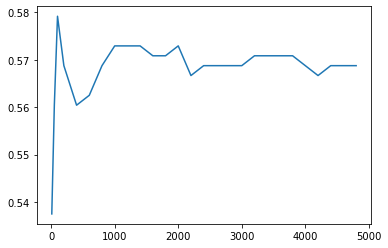

In [41]:
result_df = pd.DataFrame(result)

plt.plot(result_df.c, result_df.res_test)


4.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек sklearn и xgboost. Сравните значение метрики accuracy по cross_val_score

In [43]:
classifiers = [
    {'name':'GradientBoostingClassifier_name', 'classifier': GradientBoostingClassifier(random_state=42)},
    {'name': 'XGBClassifier_name', 'classifier': XGBClassifier(random_state=42)}
]

for clas in classifiers:
    classifier_name = clas['name']
    classifier = clas['classifier']
    cross_val = cross_val_score(classifier, x, y, scoring="accuracy", cv=3).mean()
    print(classifier_name,  cross_val)


GradientBoostingClassifier_name 0.4202626641651032
[16:00:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\MrWind\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MrWind\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:00:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\MrWind\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:01:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier_name 0.4208880550343965


5.Подберите оптимальные параметры этих алгоритмов с помощью GridSearchCV(cv=3).
Параметры для оптимизации:

оптимизируемый функционал

скорость обучения

количество деревьев

глубина деревьев

Сравните значение метрики accuracy и скорость работы. Выведите лучшие параметры алгоритмов.

In [56]:
classifiers = [
    {'name': GradientBoostingClassifier, 'parametr': [{'learning_rate': [1, 2, 3], 'n_estimators': [6, 8, 10], 'max_depth': [2, 3, 4]}]},
    {'name': XGBClassifier, 'parametr': [{'learning_rate': [1, 2, 3], 'n_estimators': [6, 8, 10], 'max_depth': [2, 3, 4]}]}
]
list = []
for c in classifiers:
    classifier_name = c['name']
    params = c['parametr']
    start_time = datetime.now()
    acc = GridSearchCV(classifier_name(), param_grid=params, scoring='accuracy', cv=3, n_jobs=-1).fit(x, y)
    lst = pd.DataFrame(acc.cv_results_)
    lst['classifier_name'] = classifier_name
    list.append(lst)
    print(classifier_name, acc.best_params_, datetime.now() - start_time)




<class 'sklearn.ensemble._gb.GradientBoostingClassifier'> {'learning_rate': 1, 'max_depth': 2, 'n_estimators': 6} 0:00:05.436282
[19:00:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
<class 'xgboost.sklearn.XGBClassifier'> {'learning_rate': 3, 'max_depth': 2, 'n_estimators': 10} 0:00:01.899389


C:\Users\MrWind\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


6.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек lightgbm и catboost. Сравните значение метрики accuracy по cross_val_score по всем четырем реализациям.

In [72]:
classifiers = {
    'Light_GBM_Classifier': LGBMClassifier(random_state=42),
    'CatBoost_Classifier': CatBoostClassifier(random_state=42, verbose=False)
}

result = {}
for classifiers_name, classifier in classifiers.items():
    classifier.fit(x_train, y_train)
    result[classifiers_name] = np.mean(cross_val_score(classifier, x_test, y_test, scoring="accuracy",cv=3))
pd.DataFrame.from_dict(result, orient='index', columns=['accuracy'])



,accuracy
Light_GBM_Classifier,0.485417
CatBoost_Classifier,0.495833


7.Подберите оптимальные параметры для алгоритмов градиентного бустинга из библиотек lightgbm и catboost с теми же условиями. Выведите лучшие параметры алгоритмов.
Сравните значение метрики accuracy и скорость по этим четырем реализациям.

In [83]:
params_lightgbm = {
    'learning_rate': [1, 2, 3],
    'n_estimators': [6, 8, 10],
    'max_depth': [2, 3, 4]
}
params_catboost = {
    'learning_rate': [1, 2, 3],
    'n_estimators': [6, 8, 10],
    'max_depth': [2, 3, 4]
}

classifiers = [
    ('Light_GBM_Classifier', LGBMClassifier(random_state=42), params_lightgbm),
    ('CatBoost_Classifier', CatBoostClassifier(random_state=42, verbose=False), params_catboost)
]

for classifiers_name, classifier in classifiers:
    grid = GridSearchCV(classifier, scoring='accuracy', cv=3, n_jobs=-1)
    fit_model = grid.fit(x_train, y_train)
    print(classifiers_name, fit_model.score(x_test, y_test))


ValueError: too many values to unpack (expected 2)

8.Подберите оптимальные параметры алгоритма из библиотеки xgbost с помощью [hyperopt](https://github.com/hyperopt/hyperopt) . Параметры для оптимизации:

оптимизируемый функционал

скорость обучения

количество деревьев

глубина деревьев

Сравните результат с поиском по сетке из sklearn. Выведите лучшие параметры алгоритма, найденные даным способом.

9.Выведите качество по метрике accuracy стэкинга (StackingClassifier) 4-х алгоритмов с базовыми параметрами градиентного бустинга.

10.Выведите качество по метрике accuracy стэкинга 4-х алгоритмов с оптимальными параметрами градиентного бустинга. Сравните результаты с предыдущим шагом и напишите какой вывод можно из этого сделать.